In [113]:
# Imports 


import pandas as pd 
from matplotlib import pyplot as plt
import requests
import numpy as np 


In [106]:
# Tried connecting to API but was unsuccesfull 
# API 
# url =  "0d82b7e788mshf89453c3067ab51p1c915fjsnb3247cb71a19"
#  # "https://api.fantasynerds.com/v1/nfl/dfs?apikey=TEST&slateId="

# # response = requests.get(url)
#  # data = response.json()
# # type(data)
#  # data.keys()

# # fantasy_points = pd.DataFrame(data['players'])
# # fantasy_points.head()
# # data["players"]
# # fantasy_points['ownership']


In [219]:
# Loading CSV's for Analysis 

stats_2021 = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2021.csv", index_col='Player')
stats_2020 = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv", index_col='Player' )
stats_2019 = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv", index_col='Player' )
stats_2018 = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv", index_col='Player' )
stats_2017 = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv", index_col='Player' )
stats_2016 = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv", index_col='Player' )

In [220]:
# Cleaning Data 
stats_2021 = stats_2021.drop(columns="Unnamed: 0")
stats_20220 =stats_2020.drop(columns="Unnamed: 0")
stats_2019 = stats_2019.drop(columns="Unnamed: 0")
stats_2018 =stats_2018.drop(columns="Unnamed: 0")
stats_2017 = stats_2017.drop(columns="Unnamed: 0")
stats_2016 = stats_2016.drop(columns="Unnamed: 0")

# Adding Year Column
stats_2021["Year"] = "2021"
stats_2020["Year"] = "2020"
stats_2019["Year"] = "2019"
stats_2018["Year"] = "2018"
stats_2017["Year"] = "2017"
stats_2016["Year"] = "2016"

# Dropping null values 
stats_2021.dropna(inplace=True)
stats_2020.dropna(inplace=True)
stats_2019.dropna(inplace=True)
stats_2018.dropna(inplace=True)
stats_2017.dropna(inplace=True)
stats_2016.dropna(inplace=True)

# Checking keys in database
stats_2021.keys()

Index(['Tm', 'Pos', 'Age', 'G', 'GS', 'Tgt', 'Rec', 'PassingYds', 'PassingTD',
       'PassingAtt', 'RushingYds', 'RushingTD', 'RushingAtt', 'ReceivingYds',
       'ReceivingTD', 'FantasyPoints', 'Int', 'Fumbles', 'FumblesLost',
       'Year'],
      dtype='object')

In [221]:
# Function: Creating DF's by position - Called by {position}_position 

def RB_position(df):

    new_df = df.loc[df['Pos'] == 'RB']

    return new_df

def WR_position(df):

    new_df = df.loc[df['Pos'] == 'WR']

    return new_df

def QB_position(df):

    new_df = df.loc[df['Pos'] == 'QB']

    return new_df

def TE_position(df):

    new_df = df.loc[df['Pos'] == 'TE']

    return new_df

def zero_position(df):

    new_df = df.loc[df['Pos'] == '0']

    return new_df

# Applying by position function to CSV's 

RB_stats_2021 = RB_position(stats_2021)
RB_stats_2020 = RB_position(stats_2020)
RB_stats_20219 =RB_position(stats_2019)
RB_stats_2018 = RB_position(stats_2018)
RB_stats_2017 = RB_position(stats_2017)
RB_stats_2016 = RB_position(stats_2016)

WR_stats_2021 = WR_position(stats_2021)
WR_stats_2020 = WR_position(stats_2020)
WR_stats_20219 =WR_position(stats_2019)
WR_stats_2018 = WR_position(stats_2018)
WR_stats_2017 = WR_position(stats_2017)
WR_stats_2016 = WR_position(stats_2016)

QB_stats_2021 = QB_position(stats_2021)
QB_stats_2020 = QB_position(stats_2020)
QB_stats_20219 =QB_position(stats_2019)
QB_stats_2018 = QB_position(stats_2018)
QB_stats_2017 = QB_position(stats_2017)
QB_stats_2016 = QB_position(stats_2016)

TE_stats_2021 = TE_position(stats_2021)
TE_stats_2020 = TE_position(stats_2020)
TE_stats_20219 =TE_position(stats_2019)
TE_stats_2018 = TE_position(stats_2018)
TE_stats_2017 = TE_position(stats_2017)
TE_stats_2016 = TE_position(stats_2016)

(array([4., 8., 3., 1., 1., 1., 1., 0., 0., 1.]),
 array([153., 171., 189., 207., 225., 243., 261., 279., 297., 315., 333.]),
 <BarContainer object of 10 artists>)

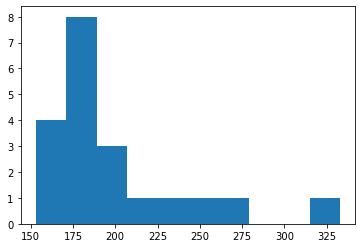

In [226]:
# Having trouble plotting Historgram, not taking names into account. Review Lecture 

def fantasy_points(df): 
    
    his_df = df['FantasyPoints']
    his_df.dropna
    new_df =his_df.iloc[0:20]
    
    
    his_graph = plt.hist(new_df)
    
    return his_graph


fantasy_points(RB_stats_2021)    
